In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading data

In [2]:
df_billet = pd.read_csv('billets.csv', sep=';')

In [3]:
df_billet.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [4]:
 df_billet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


## Describe various features of the dataset, including mean, standard deviation, median, minimum and maximum values

In [5]:
df_billet.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


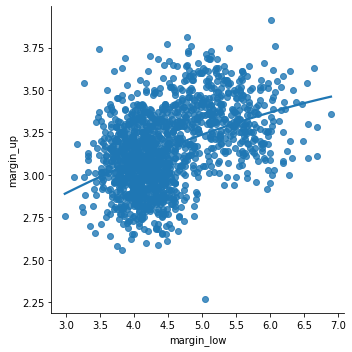

In [6]:
sns.lmplot(x ="margin_low", y ="margin_up", data = df_billet, order = 2, ci = None)


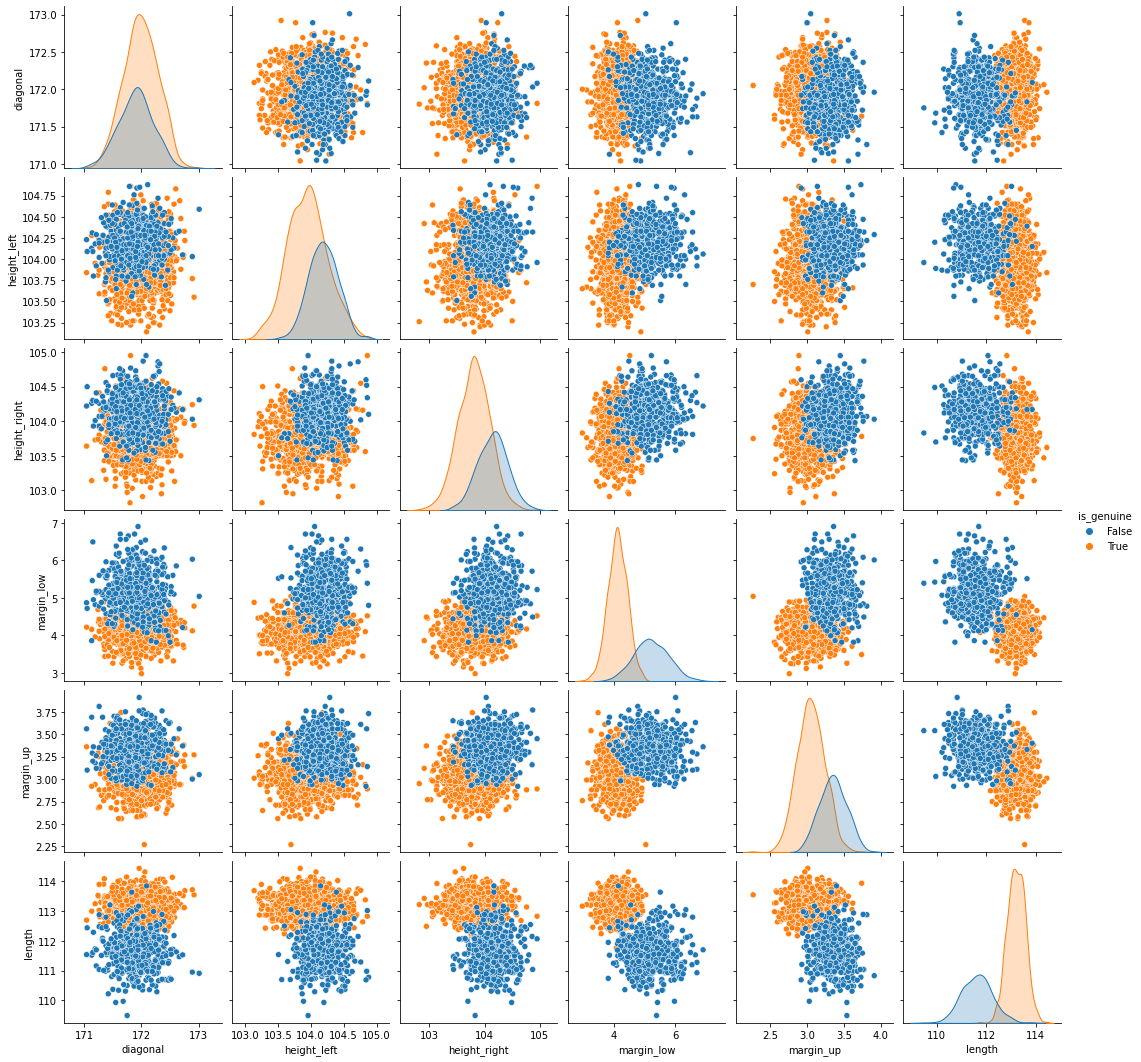

In [7]:
sns.pairplot(df_billet, hue="is_genuine")

In [13]:
num_billet = len(df_billet)
num_fake = len(df_billet[df_billet['is_genuine'] == True])
num_genuine = len(df_billet[df_billet['is_genuine'] == False])
print("Total number of billet : {}".format(num_billet))
print("Total number of fake billet: {}".format(num_fake))
print("Total number of genuine billet: {}".format(num_genuine))

Total number of billet : 1500
Total number of fake billet: 1000
Total number of genuine billet: 500


In [14]:
missing_data = df_billet.isnull().sum().sum()
if missing_data == 0:
    print('\nThe data does not have missing information')
else:
    print('\nThe dataset contains {} missing information'.format(missing_data))


The dataset contains 37 missing information


In [15]:
df_billet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


#  Filling missing values with a Linear Regression Model

### 1) The linear regression model uses other columns to fill the missing values in the margin_low column.
### 2) The algorithm works by selecting all the columns (is_genuine, diagonal, height_left, height_right, margin_up and lenght). 
### 3) However margin_low is not used during the fitting.
### 4) Then after filling the missing values in the margin_low column, we will use logistic regression model to   perform the classification

In [16]:
# import linear regression from sklearn
from sklearn.linear_model import LinearRegression
# instantiate linear regression 
l_regression = LinearRegression()
# define the train set (all the non null values) and the test set (all the null values) 
test_data = df_billet[df_billet['margin_low'].isnull()==True]
train_data = df_billet[df_billet['margin_low'].isnull()==False]
train_data_copy = train_data.copy()
# train data and remove the target column margin_low
y_train = train_data['margin_low']
train_data.drop('margin_low',axis=1,inplace=True)
#  fit the train data
l_regression.fit(train_data,y_train)
# Define the test data and remove the target column margin_lo
test_data.drop('margin_low',axis=1,inplace=True)
# perform the prediction 
pred_values = l_regression.predict(test_data)
test_data['margin_low']= pred_values

In [17]:
test_data.head()

,is_genuine,diagonal,height_left,height_right,margin_up,length,margin_low
72,True,171.94,103.89,103.45,3.25,112.79,4.064954
99,True,171.93,104.07,104.18,3.14,113.08,4.111990
151,True,172.07,103.80,104.38,3.02,112.93,4.134003
197,True,171.45,103.66,103.80,3.62,113.27,3.993571
241,True,171.83,104.14,104.06,3.02,112.36,4.140399


In [18]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 72 to 1438
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    37 non-null     bool   
 1   diagonal      37 non-null     float64
 2   height_left   37 non-null     float64
 3   height_right  37 non-null     float64
 4   margin_up     37 non-null     float64
 5   length        37 non-null     float64
 6   margin_low    37 non-null     float64
dtypes: bool(1), float64(6)
memory usage: 2.1 KB


In [19]:
test_data.shape

(37, 7)

In [20]:
test_data.describe()

,diagonal,height_left,height_right,margin_up,length,margin_low
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000
mean,171.928649,103.958378,103.874054,3.087838,112.826486,4.359368
std,0.297145,0.288680,0.380631,0.239782,0.851388,0.470245
min,171.370000,103.260000,102.820000,2.560000,110.310000,3.993571
25%,171.800000,103.720000,103.620000,2.990000,112.410000,4.096960
50%,171.930000,103.950000,103.860000,3.070000,112.950000,4.125390
75%,172.070000,104.150000,104.120000,3.230000,113.350000,4.198423
max,172.660000,104.490000,104.660000,3.620000,114.440000,5.302069


In [21]:
train_data['margin_low'] = y_train

In [22]:
# Copy the data
train_data_copy =train_data.copy()

# concatenating train_data_copy and test_data along rows
vertical_concat = pd.concat([train_data_copy, test_data], axis=0)
 
display(vertical_concat)


,is_genuine,diagonal,height_left,height_right,margin_up,length,margin_low
0,True,171.81,104.86,104.95,2.89,112.83,4.520000
1,True,171.46,103.36,103.66,2.99,113.09,3.770000
2,True,172.69,104.48,103.50,2.94,113.16,4.400000
3,True,171.36,103.91,103.94,3.01,113.51,3.620000
4,True,171.73,104.28,103.46,3.48,112.54,4.040000
...,...,...,...,...,...,...,...
1303,False,172.17,104.49,103.76,2.93,111.21,5.302069
1315,False,172.08,104.15,104.17,3.40,112.29,5.200358
1347,False,171.72,104.46,104.12,3.61,110.31,5.175468
1435,False,172.66,104.33,104.41,3.56,111.47,5.173450


In [23]:
print('The Number of Null in the data: ')
vertical_concat.isnull().sum()

The Number of Null in the data: 


is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_up       0
length          0
margin_low      0
dtype: int64

## Feature Selection

In [24]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = vertical_concat.iloc[:,0:20]  #independent columns
y = vertical_concat.iloc[:,-7]    #target column is_genuine
#apply SelectKBest class to extract top 6 best features
bestfeatures = SelectKBest(score_func=chi2, k=6)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

          Specs       Score
0    is_genuine  500.000000
6    margin_low   90.000240
4     margin_up    9.394747
5        length    7.308474
3  height_right    0.359907
2   height_left    0.186429
1      diagonal    0.014310


[0.67950798 0.00165979 0.02187459 0.02094057 0.03898173 0.11104184
 0.1259935 ]


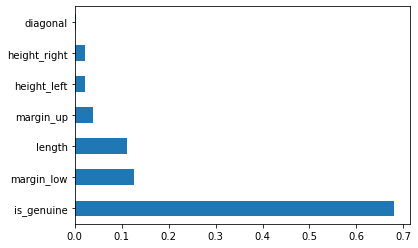

In [25]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

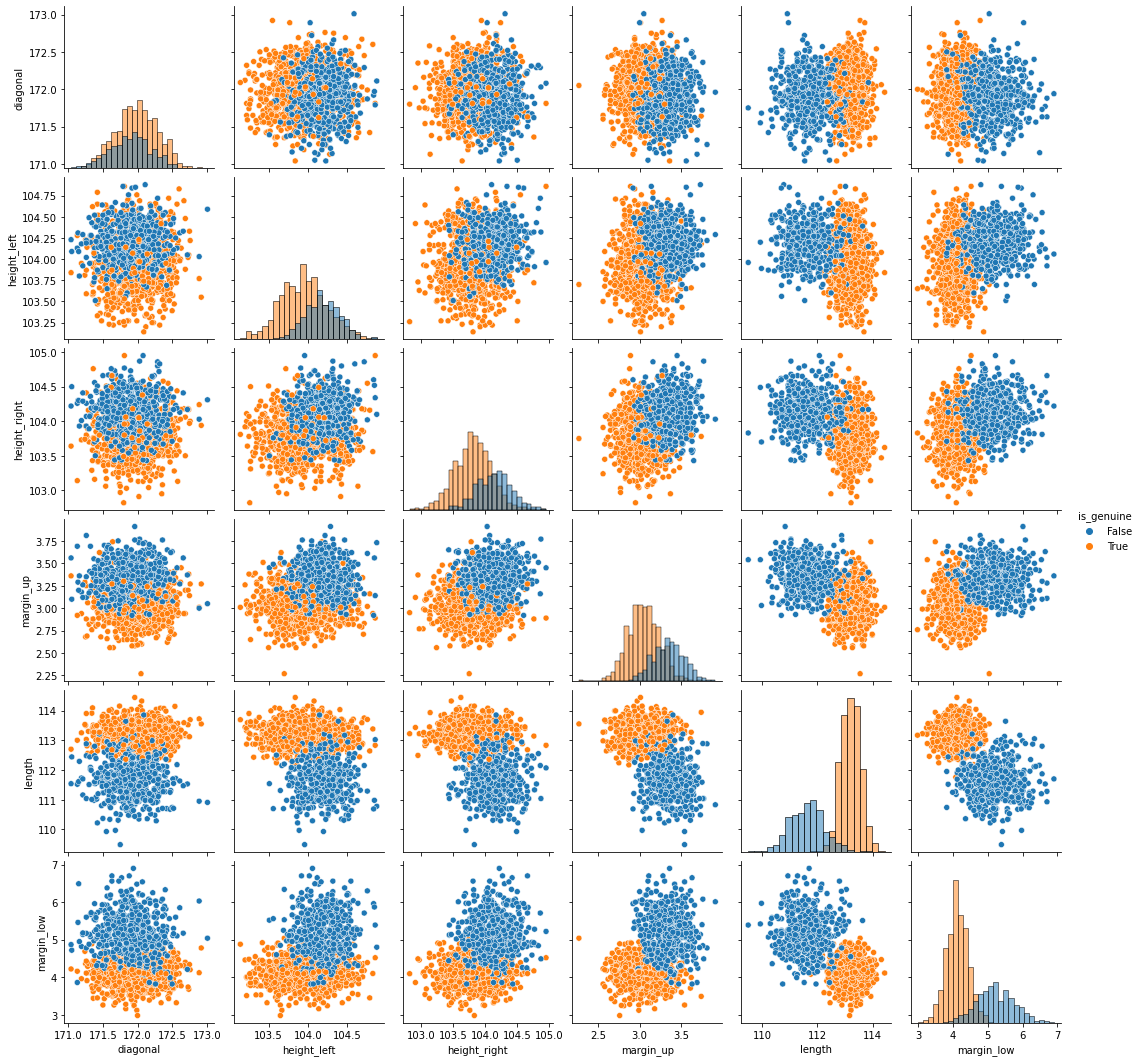

In [25]:
sns.pairplot(vertical_concat, hue="is_genuine",diag_kind="hist")
plt.show()

In [26]:
data = vertical_concat.copy()

# The kmean method 

## KElbowVisualizer to determine the best value of k

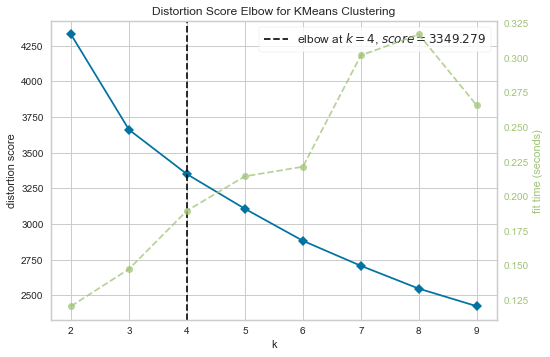

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [27]:
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
to_model_columns=data.columns[2:7]
std_scale = preprocessing.StandardScaler().fit(data[to_model_columns])
X_scaled = std_scale.transform(data[to_model_columns])
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10)).fit(X_scaled)
visualizer.show()

In [28]:
classes = data['is_genuine']
features = data.drop('is_genuine', axis=1)

In [29]:
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(features)
X_scaled = std_scale.transform(features)
# préparation des données pour le clustering
X = features.values
# Clustering par K-means
km = KMeans(n_clusters=4)
km.fit(X_scaled)
# Determine which clusters each data point belongs to:
clusterkmeans =  km.fit_predict(X_scaled)
# Récupération des clusters attribués à chaque individu
clusters = km.labels_

# Add the cluster number to the original scaled data
X_clustered2 = pd.DataFrame(X_scaled, index=data.index, columns=features.columns)
X_clustered2["cluster"] = clusterkmeans
X_clustered2.head()


,diagonal,height_left,height_right,margin_up,length,margin_low,cluster
0,-0.486540,2.774123,3.163240,-1.128325,0.173651,0.056324,2
1,-1.633729,-2.236535,-0.799668,-0.696799,0.471666,-1.080592,3
2,2.397823,1.504756,-1.291191,-0.912562,0.551901,-0.125583,0
3,-1.961498,-0.399294,0.060498,-0.610494,0.953075,-1.307975,2
4,-0.748754,0.836669,-1.414072,1.417677,-0.158750,-0.671303,2


<Figure size 720x576 with 0 Axes>

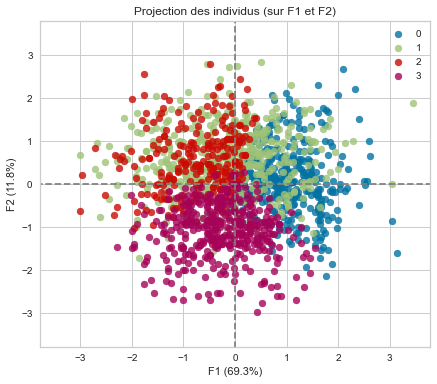

In [30]:
from sklearn import decomposition
from functions import *
pca = decomposition.PCA().fit(features)
centres_reduced = pca.transform(km.cluster_centers_)
plt.figure(figsize=(10,8))
display_factorial_planes(X_scaled, 2, pca, [(0,1)], illustrative_var = clusterkmeans, alpha = 0.8)
plt.show()

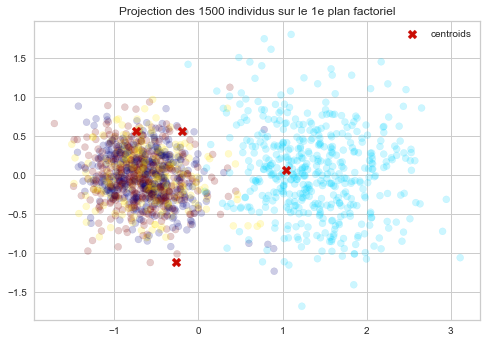

In [31]:
# Affichage du clustering par projection des individus sur le premier plan factoriel
pca = decomposition.PCA(n_components=4).fit(X)
X_projected = pca.transform(X)
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=clusters.astype(np.float), cmap = 'jet', alpha=.2)
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],marker="X", c="r", s=80, label="centroids")
plt.title("Projection des {} individus sur le 1e plan factoriel".format(X_projected.shape[0]))
plt.legend()
plt.show(block=False)

## Shuffle and Split Data

###               70% of the data will be used for training and 30% for testing.

In [32]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# # Split the 'features' and 'classes' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, classes, test_size = 0.3, random_state = 5)

# # Show the results of the split
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 1050 samples.
Testing set has 450 samples.


In [33]:
print(X_test.shape)
print(X_train.shape)

(450, 7)
(1050, 7)


In [34]:
X_train.head()

,is_genuine,diagonal,height_left,height_right,margin_up,length,margin_low
1335,False,172.04,104.17,103.90,3.62,111.56,5.05
650,True,172.32,104.16,104.14,3.25,113.38,3.78
198,True,171.90,104.14,103.75,2.97,113.00,4.56
1120,False,171.48,104.46,104.24,3.61,110.80,4.94
1350,False,171.38,103.78,103.70,3.43,111.60,5.22


### The evaluation metrics to quantify the performance of the solution

In [35]:

# Calculate Accuracy
accuracy = float(num_fake)/num_billet

# Calculate F-Score with beta = 2
precision = accuracy
recall = 1
beta = 2
fscore = (1 + beta ** 2) * precision * recall /(beta ** 2 * precision + recall)

# Print the results 
print ("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))


Naive Predictor: [Accuracy score: 0.6667, F-score: 0.9091]


# Fake Billet Detection using Logistic Regression Model

In [36]:
# define the train set for the model
# train_data['margin_low'] = y_train
# train_data.shape

In [37]:
    # import Logistic Regression from sklearn
    from sklearn.linear_model import LogisticRegression
    # define the target object
    y = X_train['is_genuine']
    # # drop traget column from the data
    train_data2 = X_train.copy()
    train_data2.drop('is_genuine', axis=1, inplace=True)
    # instanciate logistic regression model
    LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                       intercept_scaling=1, l1_ratio=None, max_iter=100,
                       multi_class='auto', n_jobs=None, penalty='l2',
                       random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                       warm_start=False)
    logist_r = LogisticRegression()
    # fit the data 
    logist_r.fit(train_data2,y)

LogisticRegression()

In [38]:
test_data2 = X_test.copy()
test_data2.head()

,is_genuine,diagonal,height_left,height_right,margin_up,length,margin_low
671,True,172.07,103.64,103.67,3.20,113.83,3.86
959,True,172.31,103.98,103.53,2.97,113.47,4.04
843,True,172.61,103.98,103.73,3.16,113.11,3.87
685,True,172.21,104.28,104.37,3.30,113.92,4.06
1219,False,172.23,103.81,104.13,3.17,110.91,5.24


In [39]:

test_data2.drop("is_genuine", axis=1, inplace=True)
prediction = logist_r.predict(test_data2)

### Check the performance of the model with Accuracy score and F-score

In [40]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score
print ("Metric: [Accuracy score: {:.4f}]".format(accuracy_score(prediction, y_test)))
print('Metric: F-score',fbeta_score(prediction, y_test,average=None, beta=2))


Metric: [Accuracy score: 0.9911]
Metric: F-score [0.98611111 0.99346405]


### Check the performance of the model with the evaluation metrics. Mean_absolute_error, and Mean_squared_error metrics to check the model performance. 

In [41]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
y_test=y_test.astype(np.float32)
prediction=prediction.astype(np.float32)
mae = mean_absolute_error(y_true=y_test,y_pred=prediction)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=prediction) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=prediction,squared=False)
print ("Metric: [MAE: {:.4f}]".format(mae))
print ("Metric: [MSE: {:.4f}]".format(mse))
print ("Metric: [RMSE: {:.4f}]".format(rmse))

Metric: [MAE: 0.0089]
Metric: [MSE: 0.0089]
Metric: [RMSE: 0.0943]


## La matrice de confusion

In [42]:
from sklearn.metrics import confusion_matrix

In [43]:
confusion_matrix(y_test, prediction)

array([[142,   2],
       [  2, 304]], dtype=int64)

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

clf = make_pipeline(StandardScaler(), LogisticRegression(random_state=0))

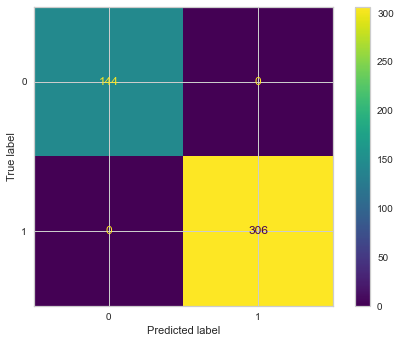

In [45]:
clf.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

# Test

In [46]:
# Pickle model: serializing and de-serializing a Python object structure.

# pickle.dump to serialize an object hierarchy, pickle.load to deserialize a data stream

import pickle
  
# Save the trained model as a pickle string.
saved_model = pickle.dumps(logist_r)
  
# Load the pickled model
reg_from_pickle = pickle.loads(saved_model)


In [47]:
df_test = pd.read_csv('billets_production.csv', sep=',')
df_test.head(10)

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,172.09,103.95,103.73,4.39,3.09,113.19,B_1
1,171.52,104.17,104.03,5.27,3.16,111.82,B_2
2,171.78,103.80,103.75,3.81,3.24,113.39,B_3
3,172.02,104.08,103.99,5.57,3.30,111.10,B_4
4,171.79,104.34,104.37,5.00,3.07,111.87,B_5


In [48]:
test_file = pd.DataFrame(df_test, columns=['diagonal', 'height_left', 'height_right', 'margin_up','length','margin_low'])

In [49]:
test_file.head()

,diagonal,height_left,height_right,margin_up,length,margin_low
0,172.09,103.95,103.73,3.09,113.19,4.39
1,171.52,104.17,104.03,3.16,111.82,5.27
2,171.78,103.80,103.75,3.24,113.39,3.81
3,172.02,104.08,103.99,3.30,111.10,5.57
4,171.79,104.34,104.37,3.07,111.87,5.00


In [50]:
# Use the loaded pickled model to make predictions
reg_from_pickle.predict(test_file)

array([ True, False,  True, False, False])